## 2.3 Теоретические задачи: Векторная модель текста

### Предустановка необходимых библиотек

In [1]:
!pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.6/532.6 KB 3.3 MB/s eta 0:00:000:00:010:00:01


### Импорт необходимых библиотек

In [13]:
from sympy.parsing import sympy_parser
from sympy import diff, symbols, log, exp

### [Найдите в общем виде производную функции потерь (бинарная кросс-энтропия) по w.](https://stepik.org/lesson/261086/step/2?unit=241830)

In [14]:
x, y, w, b = symbols("x y w b")

In [15]:
y_pred = 1 / (1 + exp(-w * x - b))

In [16]:
d = -y * log(y_pred) - (1 - y) * log(1 - y_pred)

In [17]:
d_res = diff(d, w).simplify()

In [18]:
str(d_res)

'x*(-y*exp(b + w*x) - y + exp(b + w*x))/(exp(b + w*x) + 1)'

### [Найдите в общем виде производную функции потерь (бинарная кросс-энтропия) по b.](https://stepik.org/lesson/261086/step/3?unit=241830)

In [19]:
x, y, w, b = symbols("x y w b")

In [20]:
y_pred = 1 / (1 + exp(-w * x - b))

In [21]:
d = -y * log(y_pred) - (1 - y) * log(1 - y_pred)

In [22]:
d_res_2 = diff(d, b).simplify()

In [23]:
str(d_res_2)

'(-y*exp(b + w*x) - y + exp(b + w*x))/(exp(b + w*x) + 1)'

### [Найдите в общем виде производную функции потерь (бинарная кросс-энтропия с L2-регуляризацией) по w.](https://stepik.org/lesson/261086/step/4?unit=241830)

In [24]:
x, y, w, b, c = symbols("x y w b c")

In [25]:
y_pred = 1 / (1 + exp(-w * x - b))

In [26]:
d = -y * log(y_pred) - (1 - y) * log(1 - y_pred)

In [27]:
f = d + c * (w**2 + b**2)

In [28]:
d_res_3 = diff(f, w).simplify()

In [29]:
str(d_res_3)

'(2*c*w*exp(b + w*x) + 2*c*w - x*y*exp(b + w*x) - x*y + x*exp(b + w*x))/(exp(b + w*x) + 1)'

### [Используя формулу производной функции потерь (бинарная кросс-энтропия с L2-регуляризацией), запишите формулу для обновления веса w с помощью стохастического градиентного спуска (размер минибатча равен 1)](https://stepik.org/lesson/261086/step/5?unit=241830)

In [42]:
x, y, w, b, c, t = symbols("x y w b c t")

In [43]:
y_pred = 1 / (1 + exp(-w * x - b))

In [44]:
d = -y * log(y_pred) - (1 - y) * log(1 - y_pred)

In [45]:
f = d + c * (w**2 + b**2)

In [46]:
d_res_3 = diff(f, w).simplify()

In [47]:
f_grad = w - d_res_3 * t

In [48]:
str(f_grad)

'-t*(2*c*w*exp(b + w*x) + 2*c*w - x*y*exp(b + w*x) - x*y + x*exp(b + w*x))/(exp(b + w*x) + 1) + w'

### [Напишите функцию для вычисления точечной взаимной информации двух случайных событий (PMI).](https://stepik.org/lesson/261086/step/7?unit=241830)

In [33]:
import numpy as np

In [34]:
def calculate_pmi(a, b):
    return np.log(
        np.array([1 for a_el, b_el in zip(a, b) if (a_el == 1 and b_el == 1)]).sum()
        / len(a)
        / ((a.sum() / len(a)) * (b.sum() / len(b)))
    )

In [35]:
a, b = np.array([1, 0, 0, 1, 1, 0]), np.array([1, 0, 0, 0, 1, 0])

In [36]:
calculate_pmi(a, b)

0.6931471805599453

### [Найдите количество слов, которые встречаются менее, чем в 10 из 10000 документов, если предполагать, что вероятность встретить слово в документе распределена по Ципфу с параметром s = 2, количество слов в словаре N = 1000. Ранги нумеруются с 1.](https://stepik.org/lesson/261086/step/8?unit=241830)

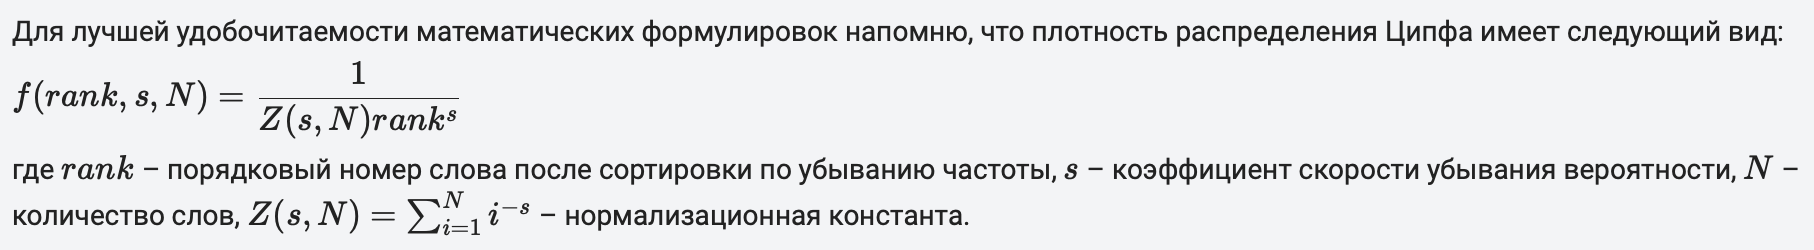

In [37]:
def get_Z(N, s):
    return sum([i ** (-s) for i in range(1, N + 1)])


def get_zipf_prob(rank, s, Z):
    return 1 / (Z * rank**s)

In [38]:
N, s = 1000, 2

In [39]:
Z = get_Z(N, s)

In [40]:
Z

1.6439345666815615

In [41]:
sum([1 for rank in range(1, N + 1) if get_zipf_prob(rank, s, Z) < 0.001])

976